# Our learning algorithm

### Introduction

In the last number of lessons, we have been built a simple linear regression machine learning.  We did so using the three components of any machine learning algorithm: first with choosing a prediction model, then fitting the model, and finally using the model to predict future data.

1. Our **prediction model** was simply a line, or a function, that given an input predicted an output.  In our example of basketball shooting, given a shooting angle, the model predicted a distance.  

2. We **fit** the model by comparing our model against the actual data.  We do this by calculating the difference between our actual data and the value that our model predicts -- this difference is called the error.  Then we square each of those errors and add up the these squared errors.  This is expressed mathematically as Sum of Squared Errors $= (actual  - predicted )^2 + (actual  - predicted )^2 +  ...$ .  

3. Now we can **predict** new distances with our fitted model.  We can predict by inputting new angles for which the updated model better predicts distances given different angles. 

### Using a machine learning library

Now wouldn't it be nice if, instead of writing these algorithms from scratch, we could use a tool to do these for us?  Well we can.

<img src="./scikitlearn.png" >

Scikit learn is an excellent tool for running machine learning algorithms.  Let's get going.

Our first step, of course, is to install the library.

In [2]:
!pip install sklearn

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


> Press shift + enter to ensure that the library is installed.

Then we do the following.

In [1]:
import sklearn

Now that we have this library, let's import the linear regression model.

## Going through our three steps

Now that we have downloaded the `scikitlearn` library, and imported the library it is time to follow our three step process of (1) creating an initial model, (2) fitting the model and (3) then fitting the model to make new predictions.

### 1. Creating an initial model

In our introduction to machine learning lesson, we created an initial model simply by writing a function that takes an input and predicts an output.  

In [21]:
def predicted_distance(angle):
    return 12 + 5*angle 

Now when working with scikitlearn we also create an initial model, but we do so by using the `LinearRegression` function from the scikitlearn library.

So first we import the `LinearRegression` function.

In [16]:
from sklearn.linear_model import LinearRegression

And now we can create our initial model.

In [19]:
linear_regression = LinearRegression()

This model is fairly abstract at this point.  And admittedly difficult to understand.  But the big takeaway is that it's pretty similar to a dictionary.  As you can see, it has key value pairs just like a dictionary does.  

In [22]:
linear_regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

It's ok that we don't understand what these key value pairs mean, we will in time.  Right now let's focus on the fact that we were able to create an initial model with the lines:

```python
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
```

And now that we have an initial model, we are ready to move onto step 2.

### 2. Fit the model with the actual data

Now that we have initialized our model with the code `linear_regression = LinearRegression()`, it is now time to pass through some data into this model so what we can fit the model.  In the last lesson, we saw how we can fit the model by comparing what a model predicts versus the results of our actual data.  We then choose the model with the lowest error by finding the model that has the lowest residual sum of squares.

Here we do the same thing, and we do so by passing the data into our model.  Let's use the same data as earlier.

| angle        | distance           
| ------------- |:-------------:| 
|    .30        | 8 feet | 
|    .50        | 11 feet | 
|    .70        | 17 feet | 

Now remember that the shooting angles are the inputs and that each angle leads to an output of a distance.  Ok, so we may like to simply pass through these inputs and outputs as two lists to our model.  And out model has a `fit` method to do precisely that.

In [29]:
angles = [.3, .5, .7]
distances = [8, 11, 17]
# linear_regression.fit()

However `scikitlearn` requires our lists to be in a specific format to pass through this data.  It wants us to organize our data like so:

In [30]:
inputs = [[.3], [.5], [.7]]
outputs = [8, 11, 17]

### A special format...but why??

Scikitlearn recognizes that can include more inputs than just one in predicting an output.  For example, in the table above we just used `angle` to predict `distance`, but later we may decide to use both `angle` and `arm speed` to predict `distance`.

|arm speed| angle        | distance           
|----| ------------- |:-------------:| 
|5 mph|    .30        | 9 feet | 
|6 mph |    .50        | 15 feet | 
|4 mph|    .70        | 21 feet | 

So scikitlearn, along with other machine learning libraries, recognize that we have rows of data, and that each row can have multiple inputs, but just one output.

So to represent the rows of inputs of `arm speed` and `angle`, we can organize our data like so:

In [31]:
inputs = [
    [5, .30],
    [6, .50],
    [4, .70],
]

So we use a nested list, where each element of the outer list is a row, with each column being a different input for that row.  For our outputs, however, there is only ever one output per row, so we can just organize our outputs in one unnested list.

In [32]:
outputs = [9, 15, 21]

So even when me move back to with just one column of input data:  

| angle        | distance           
| ------------- |:-------------:| 
|    .30        | 8 feet | 
|    .50        | 11 feet | 
|    .70        | 17 feet | 

We still use a nested list of inputs, with each element of the outer list being a row, and each element of the inner list being an input column.

In [36]:
inputs = [
    [.30],
    [.50],
    [.70],
]

### 2 (continued). Now back to fitting the model

Ok, now that we know the format for our data, the next thing to do is to fit our linear model to the data.  We do this by using the `fit` method on our linear model and passing through the data in the proper format.

In [37]:
# nested list for the inputs
inputs = [
    [.30],
    [.50],
    [.70],
]

# single list for the outputs
outputs = [8, 11, 17]

linear_regression.fit(inputs, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3. Using our fit model to predict

Believe it or not with that line there at the end, we have fit our model to our data.  Here we'll prove it.  So remember that in our Introduction to Machine Learning lesson, when we fit our model, we went forward with a function that looked like the following.



In [39]:
def predicted_distance(angle):
    return 3 + 4*angle 

So the key things that change in our model are the two numbers.  The number on the left (that's not multiplied by anything) is called the y intercept.  We can see the intercept that `scikitlearn` arrived after fitting out data with the following:

In [40]:
linear_regression.intercept_

0.7500000000000018

The number that we multiply by our angle is called the coefficient, and we can find it by calling the `coef_` method.

In [41]:
linear_regression.coef_

array([22.5])

So `scikitlearn` is telling us that really our model should look like the following:

In [43]:
def predicted_distance(angle):
    return (.75 + 22.5*angle)

### 4. Predicting new distances

Now we can get a sense of how well our new formula does.  So this was our original data that we used to fit our model:

| angle        | distance           
| ------------- |:-------------:| 
|    .30        | 8 feet | 
|    .50        | 11 feet | 
|    .70        | 17 feet | 

And this is the predictions that our updated `predicted_distance` function produces.

In [44]:
predicted_distance(.3) 

7.5

In [45]:
predicted_distance(.5) 

12.0

In [46]:
predicted_distance(.7) 

16.5

Not bad at all.  Of course, `scikitlearn` has a built in method that allows us to see the outputs of our model.  We can pass through our three rows of inputs.  But because scikitlearn does not know how many columns of inputs will be in each row, once again we use a nested list.

In [49]:
inputs = [
    [.3],
    [.5],
    [.7]
]

linear_regression.predict(inputs)

array([ 7.5, 12. , 16.5])

And we can pass through new inputs not in our data, to predict new outputs as well.

In [50]:
new_inputs = [
    [.4],
    [.6],
    [.8]
]
linear_regression.predict(new_inputs)

array([ 9.75, 14.25, 18.75])

So you can see that if we were to use a shooting angle of .4, .6, and .8, our model would predict outputs of 9.75, 14.25, and 18.75.

### Plotting our model with scikitlearn

The curve is constructed just like our multicolor plot above.  We're simply plotting how our RSS changes as we vary our values of $m$. 

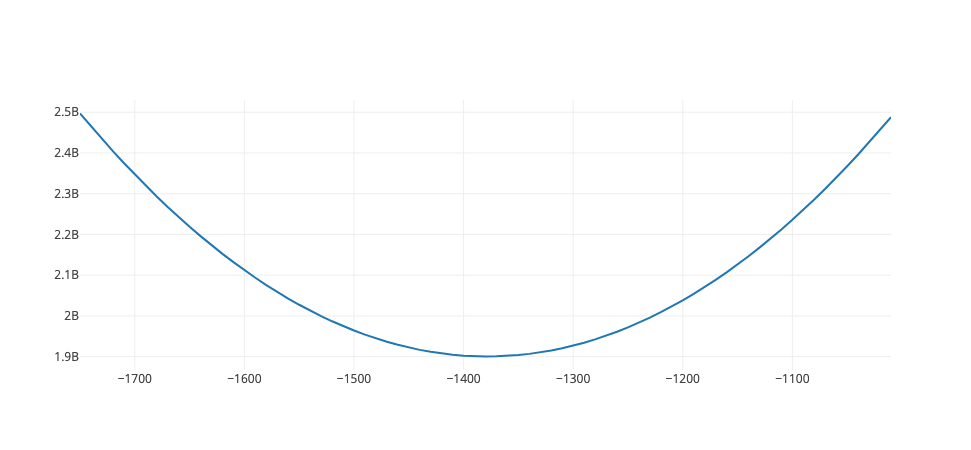

In [10]:
from graph import plot
b = 65000
m_values = list(range(-1750, -1000, 10))
rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))
rss_trace = trace_values(m_values, rss_values, mode = 'lines')
plot([rss_trace])

Now as we saw Python can find the minimum of this plot.  

```python
optimize.minimize(rss_value_vary_m, x0=-1700)
```

And it can do so without trying out every value.  

**Let's see the procedure and then we'll understand why it works** 

First we start at the point that we pass through as the $x0$ argument.  Above, we passed through the value -1700.  Then we calculates the slope of the RSS plot at this point.  So with the orange line below, you can see the slope of the line when $m= -1700$.

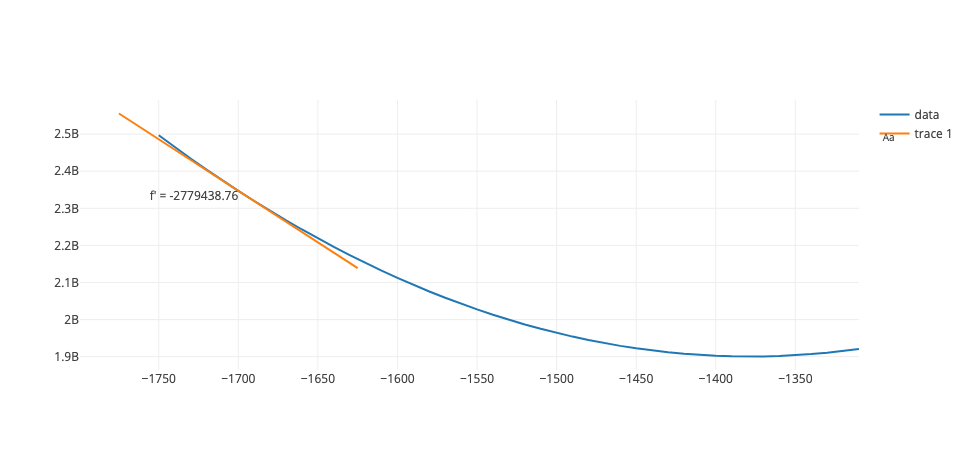

In [19]:
from calculus import derivative_trace
d_trace = derivative_trace(rss_value_vary_m, -1700, line_length = 150)
b = 65000
m_values = list(range(-1750, -1300, 10))
rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))
rss_trace = trace_values(m_values, rss_values, mode = 'lines')

plot([rss_trace, d_trace])

We take the slope of this at original value of $m$, and multiply the slope by a small negative number like $-.001$.  Whatever the result of this multiplying, we change the value of $m$ by that amount.

* $m = −1700 $
* $slope = -2779438 $

So then $-.0001*-2779438 = 278 $

So then we update our value of $m$ by this amount.

$new m = -1700 + 278 = -1422 $

Now we do this whole procedure a again.  We find the slope of our line at this new value of $m = -1422 $, find the slope of our RSS curve at that point, multiply that slope by $-.0001$ and update our $m$ value another time.

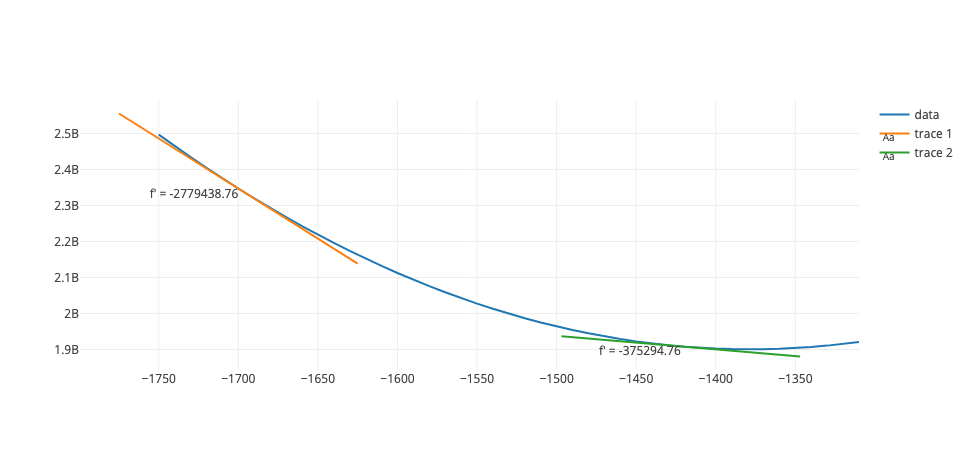

In [22]:
from calculus import derivative_trace
d_trace = derivative_trace(rss_value_vary_m, -1700, line_length = 150)
d_trace_two = derivative_trace(rss_value_vary_m, -1422, line_length = 150)
b = 65000
m_values = list(range(-1750, -1300, 10))
rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))
rss_trace = trace_values(m_values, rss_values, mode = 'lines')

plot([rss_trace, d_trace, d_trace_two])

Let's do this just one more time, and then we'll explain it.

* $m = −1422 $
* $slope = -375294 $

So then $-.0001*-375294 = 37.5 $

Again we update our value of $m$ by this number to get our new value.

$-1422 + 37.5 = -1385 $

Let's update our graph by placing the green line where our new value of $m$ is located.

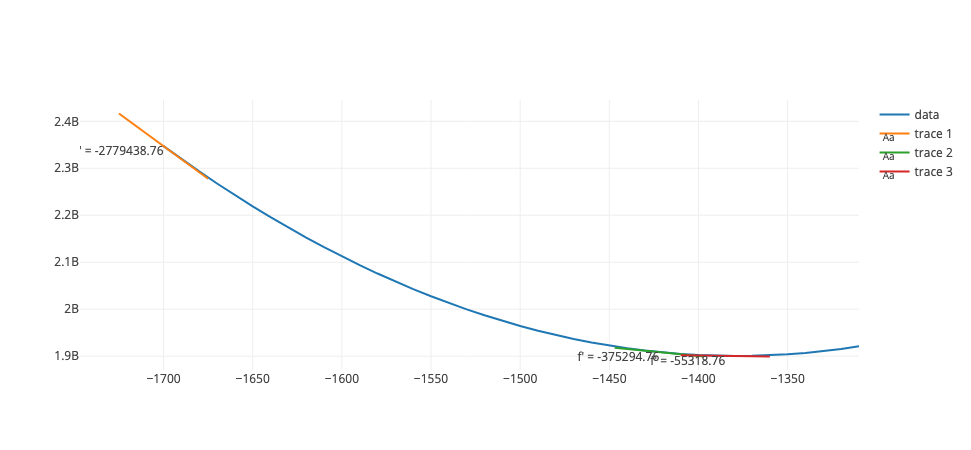

In [28]:
from calculus import derivative_trace
d_trace = derivative_trace(rss_value_vary_m, -1700, line_length = 50)
d_trace_two = derivative_trace(rss_value_vary_m, -1422, line_length = 50)
d_trace_three = derivative_trace(rss_value_vary_m, -1385, line_length = 50)
b = 65000
m_values = list(range(-1700, -1300, 10))
rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))
rss_trace = trace_values(m_values, rss_values, mode = 'lines')

plot([rss_trace, d_trace, d_trace_two, d_trace_three])

So notice that our red line is now quite close to our minimum.  Using this procedure we get to a value of -1385 in just a few steps, and when we asked Python to find the minimum it found a value of $-1378$.  So we got very close quite quickly.

### Why this procedure works so well

So our procedure of finding the minimum above was the following: 
* Start at some initial value of $m$. 
* Find the slope of the RSS curve at this point.
* Calculate an update value by multiplying the slope of RSS by a small negative number, -.001
* Update our new m to be the old m plus the update value calculated above.

Now let's understand why this works.  This works because with this procedure, we update our value of $m$, based on the slope of our parabola at this point, and **the further away from the minimum we are, the steeper the slope**, so the further away from the minimum of the curve, the more we will update our value of m.  Also, the closer we are to the minimum, the flatter the slope, and so we will update our value of m just a little.

We stop when we update our parameter by such a small number that we feel comfortable stopping, or after a set number of updates.

### Formalizing our procedure

Let's write some code that reflects the procedure in our bullet points above.  

> To find the slope at a point, we'll provide a function calculates the slope of a function at a give point, called `derivative_of`.  We won't go into the details of how we find the derivative of a function right now, so just take it as given that we can find the slope of a function at a given point, and doing so is called taking the derivative at that value.

In [48]:
from calculus import derivative_of

# set an initial value of m
m = -1700
# calculate the slope at that value of m 
slope_at_m = derivative_of(rss_value_vary_m, m, .01)

m = m + -.0001*slope_at_m

The last line is the most important.  It shows formula for how we improve our value of $m$, or as a machine learning engineer would say, this is how we *learn* $m$.

Let's rewrite this formula mathematically.

$m = m + -.0001*slopeofrss_m$

So this is our learning algorithm written mathematically.  Start with a value of m (to the right of the equals sign), then add the product of a small negative number times our slope, and set that result equal to the new value of m.

Ok, time for one more update.  This small negative number (-.0001) is called the learning rate.  It's called the learning rate because if we increase it our updates to our parameter will be larger, and vice versa.  Mathematicians use the symbol $\alpha$ for the learning rate, so let's replace it accordingly.

$m = m + -\alpha*slopeofrss_m$

### Multiple updates in code

Ok, now let's just prove this is real by doing multiple updates.  Our code is the same as previously, we just place it in a loop, and append our new value of $m$ each time.

In [49]:
number_of_iterations = 5
m_values = []
for iteration in list(range(0, number_of_iterations)):
    slope_at_m = derivative_of(rss_value_vary_m, m, .01)
    m = m + -.0001*slope_at_m
    m_values.append(m)


In [50]:
m_values

[-1384.478112,
 -1379.3975647,
 -1378.7106747,
 -1378.6178072,
 -1378.6052515000001]

Doing so shows how in just a few attempts we get zoom in on the value of -1378, which is the value of m that minimizes our RSS.  

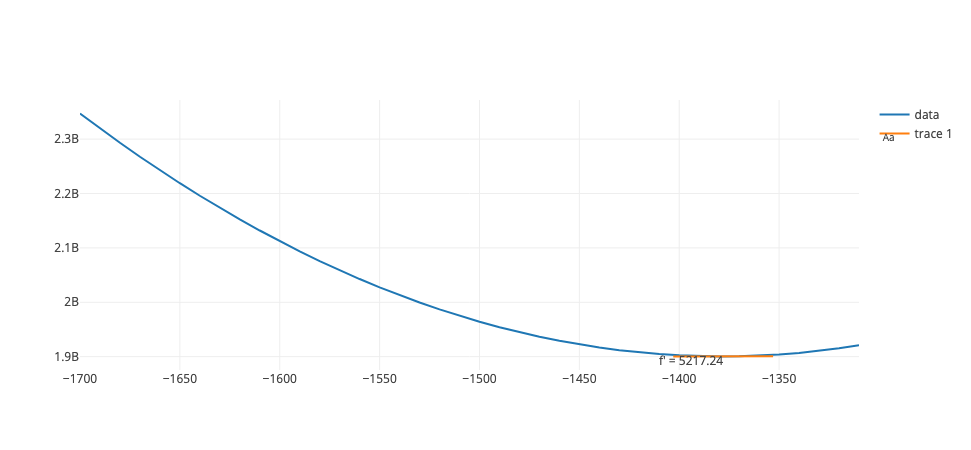

In [52]:
final_d_trace = derivative_trace(rss_value_vary_m, -1378, line_length = 50)
m_values = list(range(-1700, -1300, 10))
rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))
rss_trace = trace_values(m_values, rss_values, mode = 'lines')

plot([rss_trace, final_d_trace])

### Summary

In this lesson we dove deeper into how an algorithtm updates it's model.  In other words we dove deeper into how an algorithm learns.  We saw a stepwise procedure in which the algorithm looks at the slope of the RSS curve for a given value of m, and then updates that value of m by a the negative of a small number times that slope.  This means that our updates will be proportional to the size of the slope at a given value of m.  And because the further away from the minimum, the steeper the slope, this increases the size of the update.  As our algorithm approaches the value of m that produces the minimum, the slope of the RSS decreases, and thus so do the updates.  When those updates are sufficiently small, we stop our algorithm and use the corresponding value of m for our model.

We translated this algorithm into code and expressed this mathematically as:

$m = m + -.0001*slopeofrss_m$

We call this small number .0001 our learning rate, $\alpha$ as influences the size of the updates of our parameters, so we can rewrite our formula as the following:

$m = m + -\alpha*slopeofrss_m$